#Installing and Importing all Necessary Packages

In [1]:
!pip install tensorflow_addons
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 27.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 25.7 MB/s 
     |████████████████████████████████| 133 kB 60.9 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=a6703b6b12b0e25af97646ee0ce64e5c669aace84705d92b10663fa0c3f16ff0
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics.pairwise import cosine_similarity

import keras
from tensorflow import keras
from keras import Sequential
from keras import layers
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.utils.vis_utils import plot_model
from tensorflow.keras import Sequential, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout,SeparableConv2D, Activation, BatchNormalization, Flatten, GlobalAveragePooling2D, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG

import librosa
import librosa.display
import IPython.display as ipd

import eli5
from eli5.sklearn import PermutationImportance

import os
import warnings
warnings.filterwarnings('ignore')

#Downloading Data

In [3]:
import requests

fname = "music.zip"
url = "https://osf.io/drjhb/download"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

In [4]:
from zipfile import ZipFile

with ZipFile(fname, 'r') as zipObj:
  # Extract all the contents of zip file in different directory
  zipObj.extractall()

In [22]:
dir_ = 'Data'
df = pd.read_csv('Data/features_3_sec.csv')
df = df.iloc[0:, 1:] 

In [23]:
y = df['label']
X = df.loc[:, df.columns != 'label']

cols = X.columns
scaler = preprocessing.MinMaxScaler()
np_scaled = scaler.fit_transform(X)

X = pd.DataFrame(np_scaled, columns = cols)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Implementing and Running Various Classification Models

In [25]:
def model_assess(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(confusion_matrix(y_test, preds))
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')

In [26]:
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
lg.fit(X_train, y_train)
preds = lg.predict(X_test)
print(confusion_matrix(y_test, preds))
print('Accuracy', 'Logistic Regression', ':', round(accuracy_score(y_test, preds), 5), '\n')

sgd = SGDClassifier(max_iter=5000, random_state=0)
sgd.fit(X_train, y_train)
preds = sgd.predict(X_test)
print(confusion_matrix(y_test, preds))
print('Accuracy', 'Stochastic Gradient Descent', ':', round(accuracy_score(y_test, preds), 5), '\n')

knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, y_train)
preds = knn.predict(X_test)
print(confusion_matrix(y_test, preds))
print('Accuracy', 'KNN', ':', round(accuracy_score(y_test, preds), 5), '\n')

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
preds = tree.predict(X_test)
print(confusion_matrix(y_test, preds))
print('Accuracy', 'Decision Tree Classifier', ':', round(accuracy_score(y_test, preds), 5), '\n')

rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
rforest.fit(X_train, y_train)
preds = rforest.predict(X_test)
print(confusion_matrix(y_test, preds))
print('Accuracy', 'Random Forest Classifier', ':', round(accuracy_score(y_test, preds), 5), '\n')

svm = SVC(decision_function_shape="ovo")
svm.fit(X_train, y_train)
preds = svm.predict(X_test)
print(confusion_matrix(y_test, preds))
print('Accuracy', 'Support Vector Maching', ':', round(accuracy_score(y_test, preds), 5), '\n')

ada = AdaBoostClassifier(n_estimators=1000)
ada.fit(X_train, y_train)
preds = ada.predict(X_test)
print(confusion_matrix(y_test, preds))
print('Accuracy', 'Ada Boost Classifier', ':', round(accuracy_score(y_test, preds), 5), '\n')

[[212   5  12   7   4  18  40   0  11  10]
 [  2 287   5   0   0  10   0   0   0   4]
 [ 23   1 166  18   2  21   1  19   9  26]
 [  3   5  15 182  23   3  16  21  15  18]
 [  8   2   8  17 201   0  15  24  31   5]
 [ 11  28  14   5   1 214   0   2   7   4]
 [ 10   0   0   7   4   0 266   0   3  13]
 [  0   0  14   8  11   0   0 226   3   5]
 [ 14   1  19  12  29   5   8  10 210   8]
 [ 35   3  25  32   5  14  22  18  19 127]]
Accuracy Logistic Regression : 0.6977 

[[257   9   9   3   8  15  12   0   6   0]
 [  1 302   3   0   0   2   0   0   0   0]
 [ 51   7 150  12   7  29   0  13  13   4]
 [ 15  10  19 145  62   7   2  25  14   2]
 [ 15   5   8   2 237   0   6  15  21   2]
 [ 17  48   6   1   2 203   0   2   7   0]
 [ 32   1   5  13  12   0 231   0   5   4]
 [  1   2   7   4  19   4   0 221   7   2]
 [ 21   2  15   8  61   7   3   4 192   3]
 [ 76  13  30  46  25  29  11  14  30  26]]
Accuracy Stochastic Gradient Descent : 0.65532 

[[256   5  22   4   2   8   6   0  10   6]
 [  0 

Out of all the classifiers demonstrated above, the random forest classifier had the best classification accuracy.

Accuracy : 0.81415 



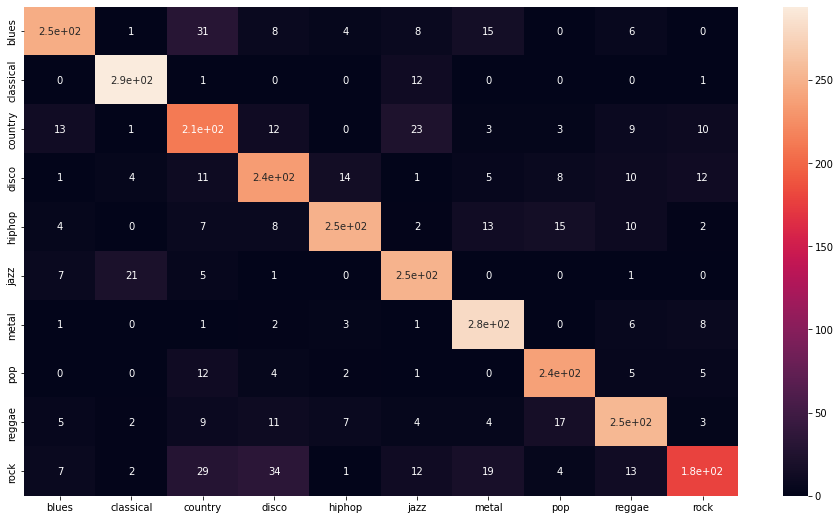

In [27]:
rf = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
rf.fit(X_train, y_train)

preds = rf.predict(X_test)

print('Accuracy', ':', round(accuracy_score(y_test, preds), 5), '\n')

conf = confusion_matrix(y_test, preds)

plt.figure(figsize = (16, 9))
sns.heatmap(conf, annot=True, 
            xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
           yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);